In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
features = np.load('features.npy')
labels = np.load('target.npy')

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [4]:
# Using GridSearchCV to find the best hyperparameters
rf_classifier = RandomForestClassifier()

In [5]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predict the test set results
y_pred = rf_classifier.predict(X_test)

In [8]:
# Evaluate the results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        86
           1       0.85      0.86      0.86        66
           2       0.97      0.96      0.97        73
           3       0.89      0.79      0.84        84
           4       0.98      0.98      0.98        59
           5       0.76      0.89      0.82        61
           6       0.93      0.84      0.88        67
           7       0.87      0.89      0.88        74

    accuracy                           0.88       570
   macro avg       0.88      0.88      0.88       570
weighted avg       0.88      0.88      0.88       570



In [9]:
print('Train Score:', rf_classifier.score(X_train, y_train))
print('Test Score:', rf_classifier.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.8771929824561403


In [10]:
import pickle
with open('rf_classifier.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

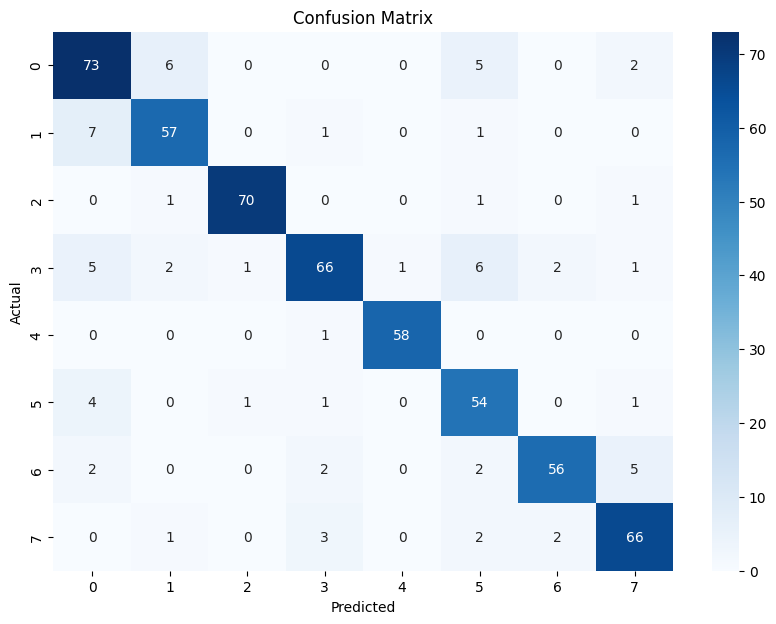

In [20]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


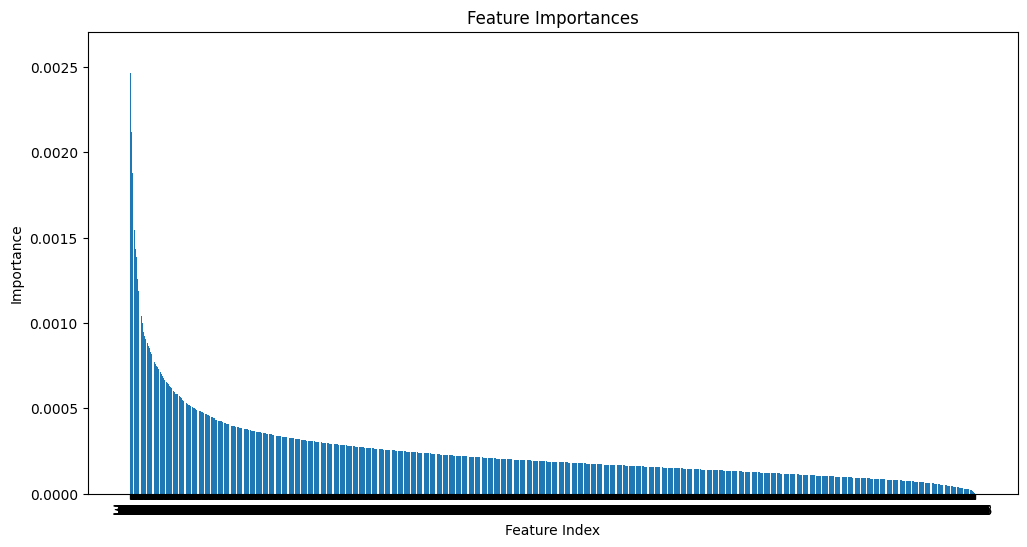

In [21]:
# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order and get their indices
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()